#***Data Cleansing***

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
%matplotlib inline

df = pd.read_csv("Automobile.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
#get df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [5]:
#getshape
print(f"Dataframe Shape : {df.shape}")

#Check have empty?
print(f"Dataframe have Empty : {df.empty}\n")

#get sum of na
print(f"All null in df : \n{df.isna().sum()}")

Dataframe Shape : (205, 26)
Dataframe have Empty : False

All null in df : 
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [6]:
#get unique data in each columns
for i in df:
  print(f"{i} : {df[i].unique()}\n")

symboling : [ 3  1  2  0 -1 -2]

normalized-losses : ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '150' '129' '115' '93' '142'
 '161' '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154'
 '74' '186' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']

make : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

fuel-type : ['gas' 'diesel']

aspiration : ['std' 'turbo']

num-of-doors : ['two' 'four' '?']

body-style : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drive-wheels : ['rwd' 'fwd' '4wd']

engine-location : ['front' 'rear']

wheel-base : [ 88.6  94.5  99.8  99.4 105.8  99.5 101.2 103.5 110.   88.4  93.7 103.3
  95.9  86.6  96.5  94.3  96.  113.  102.   93.1  95.3  98.8 104.9 106.7
 115.6  96.6 120.9 112. 

In [7]:
#Remove ? in this df   df that have ? -> normalized-losses,num-of-doors,bore,stroke,horsepower,peak-rpm,price


In [8]:

def clean_data(df):
  col = ['bore','stroke','horsepower','peak-rpm','price']

  #next we will remove ? that still in this df
  for column in col:
    df.loc[df[column]=="?",column] = np.nan
  df.dropna(axis = 0,inplace= True)

  #Convert some sol to number
  # for column in col:
  #   df[column] = pd.to_numeric(df[column])
  return df

df = clean_data(df)
df.head()




,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [9]:
#let get unique data in each columns again
for i in df:
  print(f"{i} : {df[i].unique()}\n")

symboling : [ 3  1  2  0 -1 -2]

normalized-losses : ['?' '164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '129' '115' '93' '142' '161'
 '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154' '74'
 '186' '150' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']

make : ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']

fuel-type : ['gas' 'diesel']

aspiration : ['std' 'turbo']

num-of-doors : ['two' 'four' '?']

body-style : ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drive-wheels : ['rwd' 'fwd' '4wd']

engine-location : ['front' 'rear']

wheel-base : [ 88.6  94.5  99.8  99.4 105.8 101.2 103.5 110.   88.4  93.7 103.3  95.9
  86.6  96.5  94.3  96.  113.  102.   93.1  98.8 104.9 106.7 115.6  96.6
 120.9 112.  102.7  93.   96.3  95.

In [10]:
# get shape
df.shape

(195, 26)

In [11]:
#Check the duplicate
df = df.drop_duplicates(keep='last')

In [12]:
#Size same as before drop_duplicates that mean no duplicate :)
df.shape

(195, 26)

In [13]:
#Drop na again
df = df.replace({"?":np.nan})
df.dropna(axis = 0,inplace= True)
#get sum of na
print(f"All null in df : \n{df.isna().sum()}")

All null in df : 
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [14]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [15]:
#let get unique data in each columns again
for i in df:
  print(f"{i} : {df[i].unique()}\n")

symboling : [ 2  1  0 -1  3 -2]

normalized-losses : ['164' '158' '192' '188' '121' '98' '81' '118' '148' '110' '145' '137'
 '101' '78' '106' '85' '107' '104' '113' '129' '115' '93' '142' '161'
 '153' '125' '128' '122' '103' '168' '108' '194' '231' '119' '154' '74'
 '186' '150' '83' '102' '89' '87' '77' '91' '134' '65' '197' '90' '94'
 '256' '95']

make : ['audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'jaguar' 'mazda' 'mercedes-benz'
 'mitsubishi' 'nissan' 'peugot' 'plymouth' 'porsche' 'saab' 'subaru'
 'toyota' 'volkswagen' 'volvo']

fuel-type : ['gas' 'diesel']

aspiration : ['std' 'turbo']

num-of-doors : ['four' 'two']

body-style : ['sedan' 'hatchback' 'wagon' 'hardtop' 'convertible']

drive-wheels : ['fwd' '4wd' 'rwd']

engine-location : ['front']

wheel-base : [ 99.8  99.4 105.8 101.2  88.4  94.5  93.7 103.3  95.9  86.6  96.5 113.
  93.1  98.8 104.9 110.  106.7 115.6  96.6  93.   96.3  95.1  97.2 100.4
  91.3  99.2 107.9 108.   99.1  93.3  97.   96.9  95.7  98.4 102.4 102.9
 104.5  97

In [16]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [17]:
"""This data is now ready :)
-no dulpicate
-no na
-no null
"""

'This data is now ready :)\n-no dulpicate\n-no na\n-no null\n'

In [18]:
#display data
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
10,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.80,8.8,101,5800,23,29,16430


In [19]:
# look at all values 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized-losses  159 non-null    object 
 2   make               159 non-null    object 
 3   fuel-type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num-of-doors       159 non-null    object 
 6   body-style         159 non-null    object 
 7   drive-wheels       159 non-null    object 
 8   engine-location    159 non-null    object 
 9   wheel-base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    object 
 15  num-of-cylinders   159 non-null    object 
 16  engine-size        159 non

# **Understanding data**

In [20]:
#symboling Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.
df["symboling"].astype("category").value_counts()

0     48
1     46
2     29
-1    20
3     13
-2     3
Name: symboling, dtype: int64

In [21]:
# converting symboling to categorical(symboling ควรเป็น categorical เพราะไว้เเบ่งประเภทความเสียง)
df['symboling'] = df['symboling'].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    object 
 1   normalized-losses  159 non-null    object 
 2   make               159 non-null    object 
 3   fuel-type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num-of-doors       159 non-null    object 
 6   body-style         159 non-null    object 
 7   drive-wheels       159 non-null    object 
 8   engine-location    159 non-null    object 
 9   wheel-base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    object 
 15  num-of-cylinders   159 non-null    object 
 16  engine-size        159 non

In [22]:
# aspiration: An (internal combustion) engine property showing 
# whether the oxygen intake is through standard (atmospheric pressure)
# or through turbocharging (pressurised oxygen intake)

df['aspiration'].astype('category').value_counts()

std      132
turbo     27
Name: aspiration, dtype: int64

In [23]:
# drivewheel: frontwheel, rarewheel or four-wheel drive 
df['drive-wheels'].astype('category').value_counts()

fwd    105
rwd     46
4wd      8
Name: drive-wheels, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


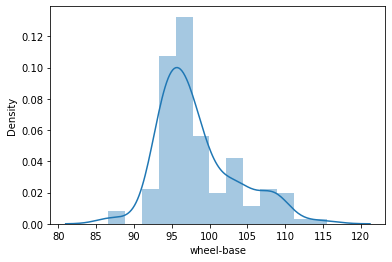

In [24]:
# wheelbase: distance between centre of front and rarewheels
sns.distplot(df['wheel-base'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


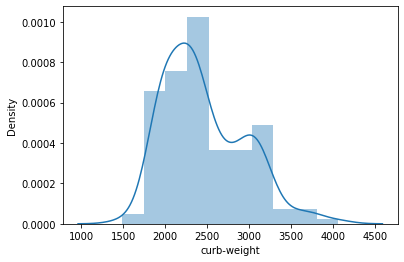

In [25]:
# curbweight: weight of car without occupants or baggage
sns.distplot(df['curb-weight'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


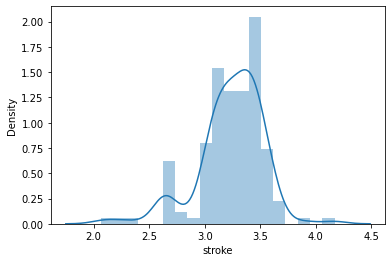

In [26]:
# stroke: volume of the engine (the distance traveled by the 
# piston in each cycle)
sns.distplot(df['stroke'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


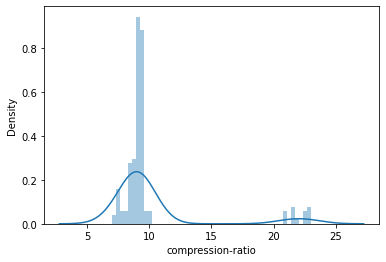

In [27]:
# compression ration: ration of volume of compression chamber 
# at largest capacity to least capacity
sns.distplot(df['compression-ratio'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


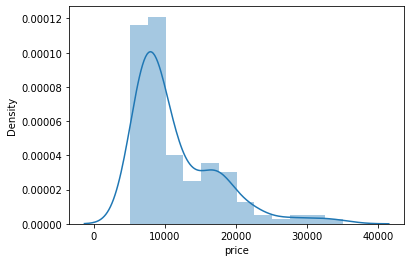

In [28]:
# target variable: price of car
sns.distplot(df['price'])
plt.show()

#***EDA***

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    object 
 1   normalized-losses  159 non-null    object 
 2   make               159 non-null    object 
 3   fuel-type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num-of-doors       159 non-null    object 
 6   body-style         159 non-null    object 
 7   drive-wheels       159 non-null    object 
 8   engine-location    159 non-null    object 
 9   wheel-base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    object 
 15  num-of-cylinders   159 non-null    object 
 16  engine-size        159 non

In [30]:
#normalized-losses, bore,	stroke,	horsepower,	peak-rpm, price should be numeric
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'])
df['bore'] = pd.to_numeric(df['bore'])
df['stroke'] = pd.to_numeric(df['stroke'])
df['horsepower'] = pd.to_numeric(df['horsepower'])
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'])
df['price'] = pd.to_numeric(df['price'])

In [31]:
#convert text to numeric categotical

df['make'].astype('category').value_counts()
df['make'].replace(['toyota','nissan', 'honda', 'subaru', 'mazda', 
                    'mitsubishi', 'dodge', 'volkswagen', 'peugot', 'plymouth ',
                    'saab', 'mercedes-benz', 'bmw', 'audi', 'chevrolet', 
                    'jaguar', 'porsche'],[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],inplace=True)

df['fuel-type'].astype('category').value_counts()
df['fuel-type'].replace(['gas','diesel'],[0,1],inplace=True)

df['aspiration'].astype('category').value_counts()
df['aspiration'].replace(['std','turbo'],[0,1],inplace=True)

df['num-of-doors'].astype('category').value_counts()
df['num-of-doors'].replace(['four','two'],[0,1],inplace=True)

df['body-style'].astype('category').value_counts()
df['body-style'].replace(['sedan','hatchback','wagon','hardtop','convertible'],[0,1,2,3,4],inplace=True)

df['drive-wheels'].astype('category').value_counts()
df['drive-wheels'].replace(['fwd','rwd','4wd'],[0,1,2],inplace=True)

df['engine-location'].astype('category').value_counts()
df['engine-location'].replace(['front','rear'],[0,1],inplace=True)

df['engine-type'].astype('category').value_counts()
df['engine-type'].replace(['ohc','ohcf','dohc','l','ohcv'],[0,1,2,3,4],inplace=True)

df['num-of-cylinders'].astype('category').value_counts()
df['num-of-cylinders'].replace(['three','four','five','six','eight'],[0,1,2,3,4],inplace=True)

df['fuel-system'].astype('category').value_counts()
df['fuel-system'].replace(['mpfi','2bbl','idi','1bbl','spdi','mfi'],[0,1,2,3,4,5],inplace=True)






In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159 entries, 3 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    object 
 1   normalized-losses  159 non-null    int64  
 2   make               159 non-null    object 
 3   fuel-type          159 non-null    int64  
 4   aspiration         159 non-null    int64  
 5   num-of-doors       159 non-null    int64  
 6   body-style         159 non-null    int64  
 7   drive-wheels       159 non-null    int64  
 8   engine-location    159 non-null    int64  
 9   wheel-base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb-weight        159 non-null    int64  
 14  engine-type        159 non-null    int64  
 15  num-of-cylinders   159 non-null    int64  
 16  engine-size        159 non

In [33]:
#select all numeric
df_numeric = df.select_dtypes(include=['float64','int'])
df_numeric.head()

,normalized-losses,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
3,164,0,0,0,0,0,0,99.8,176.6,66.2,...,109,0,3.19,3.4,10.0,102,5500,24,30,13950
4,164,0,0,0,0,2,0,99.4,176.6,66.4,...,136,0,3.19,3.4,8.0,115,5500,18,22,17450
6,158,0,0,0,0,0,0,105.8,192.7,71.4,...,136,0,3.19,3.4,8.5,110,5500,19,25,17710
8,158,0,1,0,0,0,0,105.8,192.7,71.4,...,131,0,3.13,3.4,8.3,140,5500,17,20,23875
10,192,0,0,1,0,1,0,101.2,176.8,64.8,...,108,0,3.50,2.8,8.8,101,5800,23,29,16430


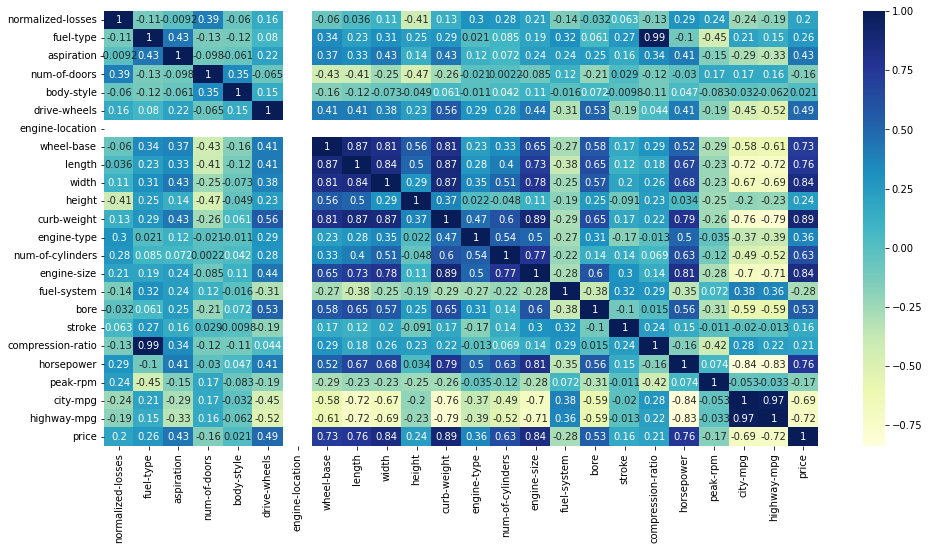

In [34]:
#create heat map 
cor = df_numeric.corr()

# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()

จากกราฟ price negatively correlated กับ highway-mpy และ price city-mpg (-0.70 approximately)

#***Data Prepare***

In [35]:
#Define X and y
X = df.loc[:,['symboling', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg','highway-mpg']]
y = df['price']

In [36]:
#select all numeric
df_obj = df.select_dtypes(include=['object'])
df_obj.head()

,symboling,make
3,2,13
4,2,13
6,1,13
8,1,13
10,2,12


In [37]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

#***Evaluation***

In [38]:
# Building the first model with all the features

# instantiate
model = LinearRegression()

# fit
model.fit(X_train, y_train)

LinearRegression()

In [39]:
# predict 
y_pred = model.predict(X_test)

# metrics
from sklearn.metrics import r2_score

print(r2_score(y_true=y_test, y_pred=y_pred))

0.8538320621201593


In [41]:
import pickle
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))